In [4]:
class Value:

    def __init__(self, data, _children = (), _op='', label=''):
        self.data = data

        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
e = a*b; e.label = 'e'
d = e + c;  d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

L

Value(data=-8.0)

In [7]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

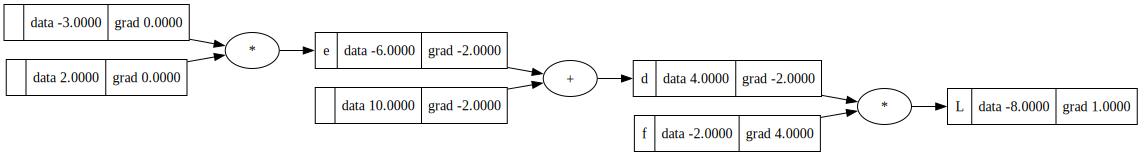

In [21]:
draw_dot(L)

In [12]:
L.grad = 1.0

In [14]:
f.grad = 4.0
d.grad = -2.0

dd / dc = 1.0
dd / de = 1.0

d = c + e

f(x+h) - f(x) / h 
(c+h+e) - (c+e) / h 
c+h+e-c-e/h
h/h
1.0

so dL / dc = ? use chain rule.
    dL / dd * (dd /dc) = -2 * 1.0 

KNOW :
dL / dd = -2.0
dd / dc = 1.0

(dL/)


In [20]:
c.grad = -2.0
e.grad = -2.0

In [18]:
def lol():

    h = 0.00001

    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b; e.label = 'e'
    d = e + c;  d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'

    L1 = L.data

    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b; e.label = 'e'
    d = e + c;  d.label = 'd'
    d.data += h
    f = Value(-2.0 , label='f')
    L = d * f; L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

-1.9999999999242843
